In [64]:
#Question-1 

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb
import random
import statistics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [188]:
column_names = ['x','y','cluster']
df = pd.read_csv('spiral-dataset.csv', names=column_names, sep='\t')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        312 non-null    float64
 1   y        312 non-null    float64
 2   cluster  312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


,x,y,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [189]:
df_main = df.copy()

In [190]:
df.describe()

,x,y,cluster
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


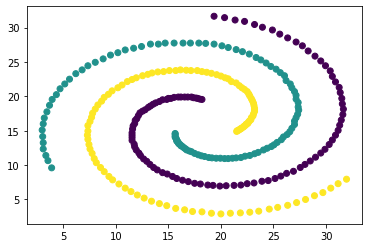

In [191]:
import matplotlib.pyplot as plt
plt.scatter(df['x'],df['y'],facecolors='none', c=df['cluster'].astype('category'))
plt.show()

In [192]:
#2 QUestion

In [193]:
def eucledian_distance(x, y, mean_x, mean_y):
    point1 = np.array((x, y))
    point2 = np.array((mean_x, mean_y))
    # calculating Euclidean distance
    dist = np.linalg.norm(point1 - point2)
    return dist

In [194]:
def finding_cluster(val1, val2, val3):
    dist_array = np.array([val1, val2, val3])
    index = np.where(dist_array == np.amin(dist_array))[0][0] + 1
    col_name = 'dist'+str(index)
    return int(index)

In [195]:
#cluster means 
def cluster_mean_x(predicted_cluster, new_mean):
    return new_mean[int(predicted_cluster)-1][0]

def cluster_mean_y(predicted_cluster, new_mean):
    return new_mean[int(predicted_cluster)-1][1]

In [196]:
#calculating SSE
def SSE(x, y, cluster_mean_x, cluster_mean_y):
    return eucledian_distance(x, y, cluster_mean_x, cluster_mean_y)**2

In [197]:
#calculating rand_index
def rand_index(y_actual, y_pred):    
    assert(len(y_actual)==len(y_pred))
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    #@TODO
    for i in range(len(y_actual)):
        if y_actual[i] == 0:
            if y_actual[i]==y_pred[i]:
                TN =TN+1
            else:
                FP = FP+1             
        elif y_actual[i] == 1:
            if y_actual[i]==y_pred[i]:
                TP = TP+1
            else:
                FN = FN+1
                
    rand_ind = (TP+TN)/(TP+TN+FP+FN)
    

    return rand_ind

In [198]:
k_val = 3
mean_list = []

for i in range(1,k_val+1):
    #randomly generating x
    x = random.randint(3,32)
    
    #randomly generating y
    y = random.randint(3,32)

    mean_list.append([x,y])
    
mean_array = np.array([np.array(i) for i in mean_list])
print(mean_array)


#generating new_mean for initial comparision
new_mean_list = []
for i in range(1,k_val+1):
    new_mean_list.append([0,0])

new_mean_array = np.array([np.array(i) for i in new_mean_list])
print(new_mean_array)

[[19 20]
 [32 11]
 [27  3]]
[[0 0]
 [0 0]
 [0 0]]


In [199]:
old_mean = new_mean_array
new_mean = mean_array
itr = 0
print(type(old_mean))
print(type(new_mean))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [200]:
not (old_mean==new_mean).all()

True

In [201]:
while ( not (old_mean==new_mean).all()):
    
    itr = itr + 1
    print(itr)
    
    df['clust_dis1'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[0][0], new_mean[0][1]), axis=1)
    df['clust_dis2'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[1][0], new_mean[1][1]), axis=1)
    df['clust_dis3'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[2][0], new_mean[2][1]), axis=1)
                           
    #assigning cluster name
    df['prediction'] = df.apply(lambda row: finding_cluster(row['clust_dis1'], row['clust_dis2'], row['clust_dis3']), axis=1)
                           
    computed_mean_list = []
    #recomputing means for each cluster and updating mean  
    for i in sorted(df['prediction'].unique()):
        computed_mean_list.append([round(df[df['prediction']==i]['x'].mean(),2), round(df[df['prediction']==i]['y'].mean(),2)])
            
    computed_mean = np.array([np.array(i) for i in computed_mean_list])
    old_mean = new_mean
    new_mean = computed_mean 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [202]:
df['mean_x'] = df.apply(lambda row:  cluster_mean_x(row['prediction'], new_mean), axis=1)
df['mean_y'] = df.apply(lambda row:  cluster_mean_y(row['prediction'], new_mean), axis=1)
df['SSE_tmp'] = df.apply(lambda row:  SSE(row['x'], row['y'], row['mean_x'], row['mean_y']), axis=1)
df.head()

,x,y,cluster,clust_dis1,clust_dis2,clust_dis3,prediction,mean_x,mean_y,SSE_tmp
0,31.95,7.95,3,23.908760,16.186677,11.345008,3,20.71,9.49,128.7092
1,31.15,7.30,3,23.475675,16.381483,10.667226,3,20.71,9.49,113.7897
2,30.45,6.65,3,23.167581,16.677245,10.145600,3,20.71,9.49,102.9332
3,29.70,6.00,3,22.852698,17.004308,9.643661,3,20.71,9.49,93.0002
4,28.90,5.55,3,22.423811,17.176088,9.088438,3,20.71,9.49,82.5997


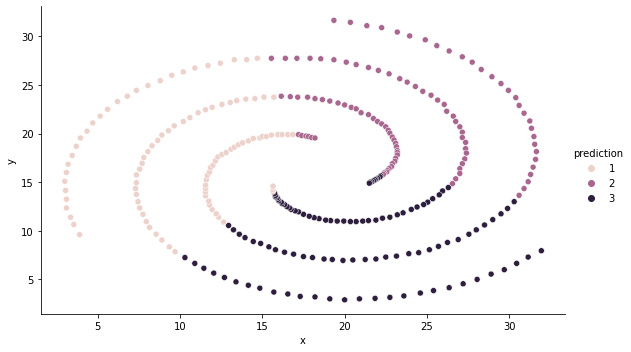

In [203]:
#visualization
sns.relplot(data=df, x='x', y='y', hue='prediction', aspect=1.61)
plt.show()

In [204]:
#SSE
sse = df['SSE_tmp'].sum()
print(sse)

#Random_index
y_true = df['cluster'].values
y_pred = df['prediction'].values
random_index = rand_index(y_true, y_pred)
print(random_index)


sse_list = [sse]
ri_list = [random_index]

12313.2833
0.32673267326732675


### Question 3

In [205]:
def rand_index(actual, pred):

    tp_plus_fp = comb(np.bincount(actual), 2).sum()
    tp_plus_fn = comb(np.bincount(pred), 2).sum()
    A = np.c_[(actual, pred)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(actual))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [206]:
#In the below function, hierarchial clustering for all the 4 linkages('single', 'complete', 'average', 'centroid') along with 3 given distance metrics('eucledian','Cosine', 'L3') are defined
def Heirarchical(data, cutoff, linkage, distance_metric):
    
    if distance_metric == 'eucledian':
        if linkage == "centroid":
            distance_matrix = pairwise_distances(data -[np.mean(data,axis =0)], data - [np.mean(data,axis =0 )],metric = "manhattan")
            print(distance_matrix)
        else:
            distance_matrix = euclidean_distances(data, data)
    elif distance_metric == 'cosine':
        distance_matrix = cosine_similarity(data, data)
    
    elif distance_metric == 'L3':
        distance_matrix = pairwise_distances(data, Y=None, metric='minkowski', p=3)

    distance_matrix = np.tril(distance_matrix)
    distance_matrix[distance_matrix==0] = np.inf
    
   
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
                      
    if (cutoff > distance_matrix.shape[0]):
        cutoff = distance_matrix.shape[0]
    if linkage == "single":
        d = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
           
            if i == 0:
                print(df.iloc[ij_min[0]])
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
             
            d[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                   
                    distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d, df[0].to_numpy()
    elif linkage == "complete":
        d_complete = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_complete[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d_complete, df[0].to_numpy()
    elif linkage == "average":
        d_average = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_average[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    distance_matrix[ij_min[1]][j] = statistics.mean([distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j]])
            distance_matrix[ij_min[0]] = np.inf
        return d_average, df[0].to_numpy()

    elif linkage == "centroid":
        d_centroid = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_centroid[i] = ij_min
            distance_matrix[ij_min[0]] = np.inf
        
    return d_centroid, df[0].to_numpy()

In [207]:
#3a 3b 3c 3d 

In [233]:
output = []
mean = []

linkages = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df_main.loc[:,['x','y']].values ,309, i, "eucledian")
    #print('mean : ',mean)
    #print(target)
    output.append(target)
    #print(len(output))
    #mean.append(d)

single
0    inf
Name: 101, dtype: float64
complete
average
centroid
[[ 0.    1.45  2.8  ... 22.6  22.85 22.95]
 [ 1.45  0.    1.35 ... 22.45 22.7  22.8 ]
 [ 2.8   1.35  0.   ... 22.4  22.65 22.75]
 ...
 [22.6  22.45 22.4  ...  0.    0.25  0.35]
 [22.85 22.7  22.65 ...  0.25  0.    0.1 ]
 [22.95 22.8  22.75 ...  0.35  0.1   0.  ]]


In [234]:
#giving names to the clusters
tmp = output[0]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[0]= tmp
output[0] = output[0].astype(int)



tmp = output[0]
tmp[tmp == 307] = 1
tmp[tmp <0] = 2
tmp[tmp == 305] = 3
output[0] = tmp
output[0] = output[0].astype(int)
        
tmp = output[1]
tmp[tmp == 307] = 1
tmp[tmp < 0] = 2
tmp[tmp == 308] = 3
output[1] = tmp
output[1] = output[1].astype(int)
    
tmp = output[2]
tmp[tmp == 307] = 1
tmp[tmp < 0] = 2
tmp[tmp == 306] = 3
output[2] = tmp
output[2] = output[2].astype(int)
  
tmp = output[3]
tmp[tmp == 304] = 1
tmp[tmp < 0] = 2
tmp[tmp == 308] = 3
output[3] = tmp
output[3] = output[3].astype(int)

In [235]:
for i in range(0,len(output)):
    df_main[linkages[i]] = output[i]

In [236]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         312 non-null    float64
 1   y         312 non-null    float64
 2   cluster   312 non-null    int64  
 3   single    312 non-null    int32  
 4   complete  312 non-null    int32  
 5   average   312 non-null    int32  
 6   centroid  312 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 12.3 KB


In [237]:
#3e Ms2 Ms3

In [238]:
#Rand_Index
for i in range(0,len(output)):
    print('Linkage : ',linkages[i])
    print('Rand_Index value: ', rand_index(df_main['cluster'].values.astype('int'), output[i]))

Linkage :  single
Rand_Index value:  0.7705911451892159
Linkage :  complete
Rand_Index value:  1.0
Linkage :  average
Rand_Index value:  1.0
Linkage :  centroid
Rand_Index value:  1.0


Linkage :  single


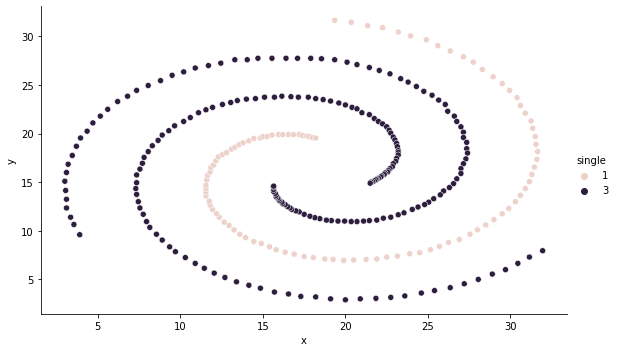

Linkage :  complete


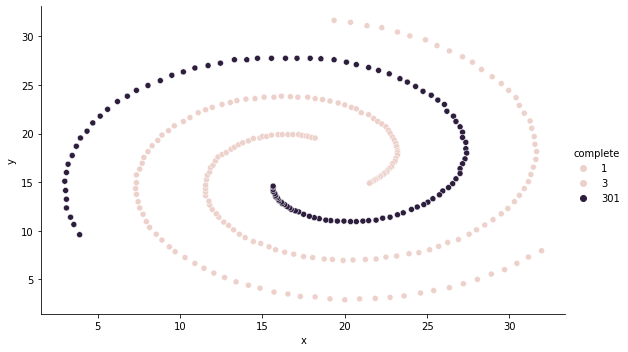

Linkage :  average


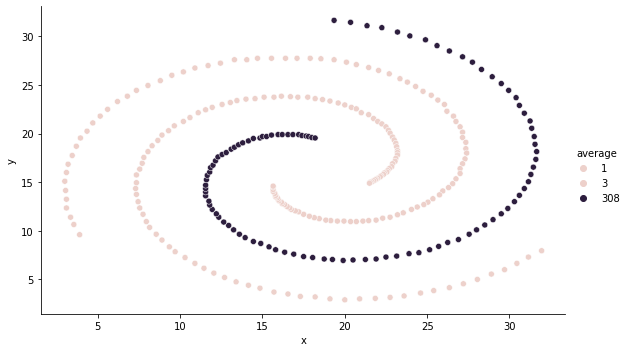

Linkage :  centroid


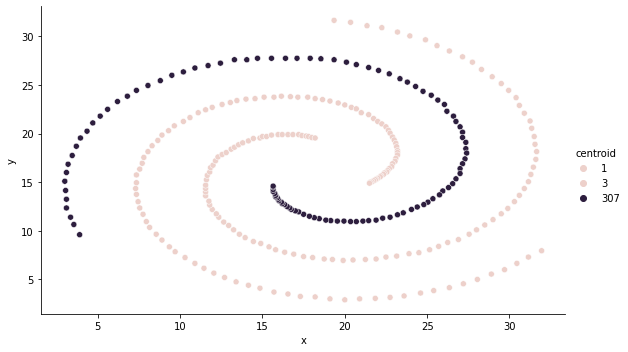

In [239]:
for i in range(0,len(output)):
    print('Linkage : ',linkages[i])
    sns.relplot(data=df_main, x='x', y='y', hue=linkages[i], aspect=1.61)
    plt.show()

Linkage :  single


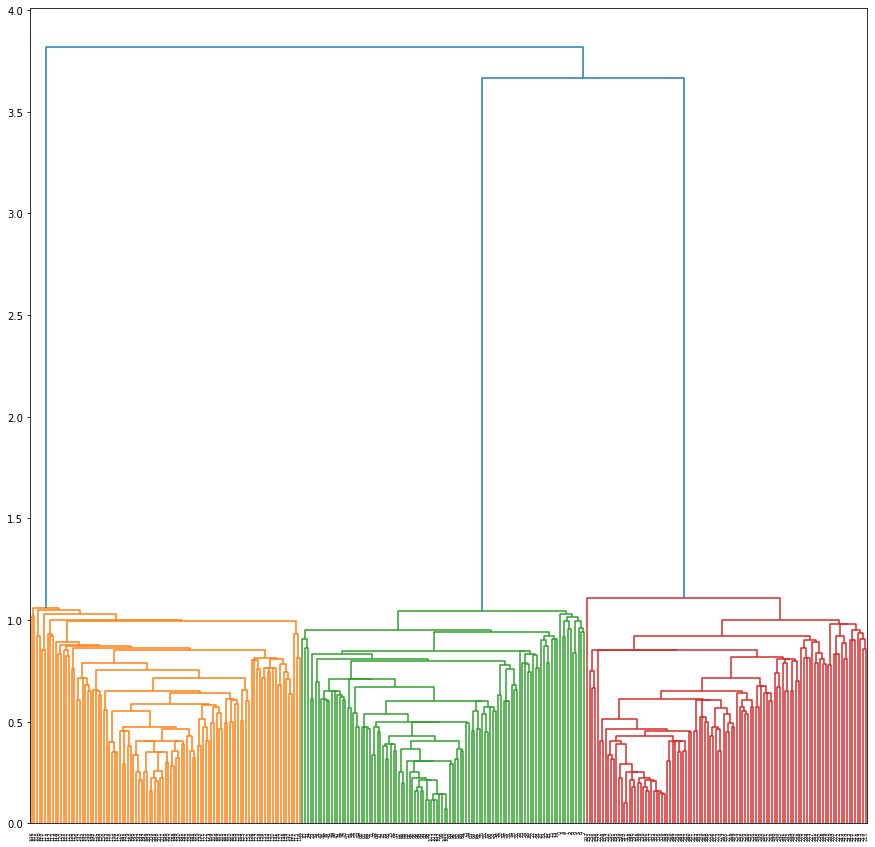

Linkage :  complete


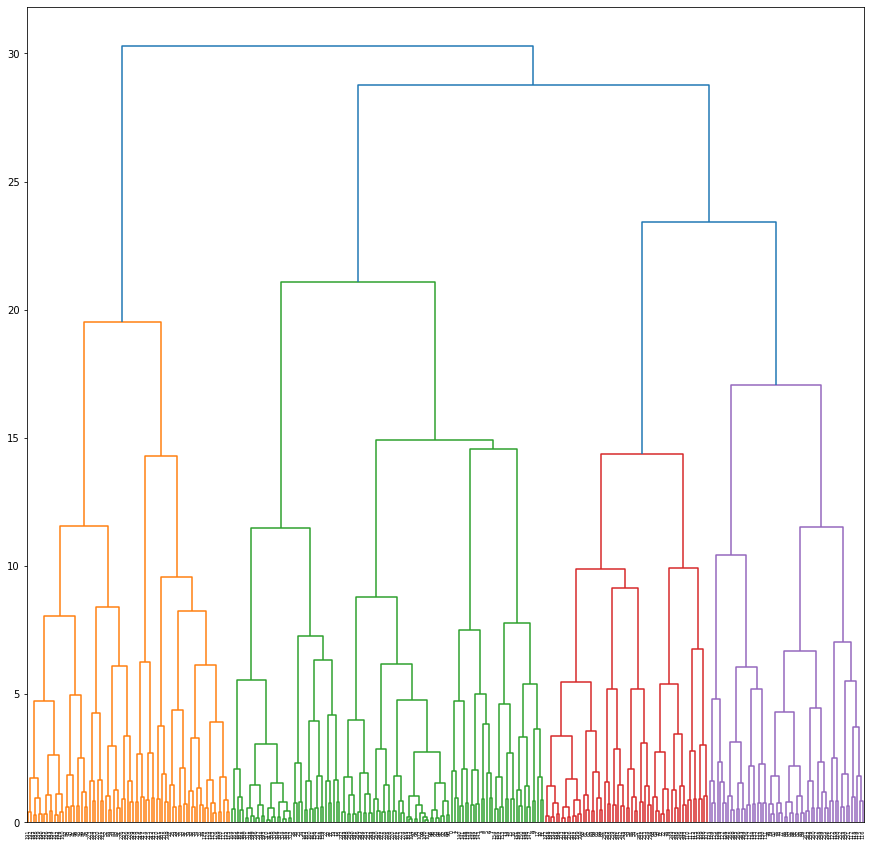

Linkage :  average


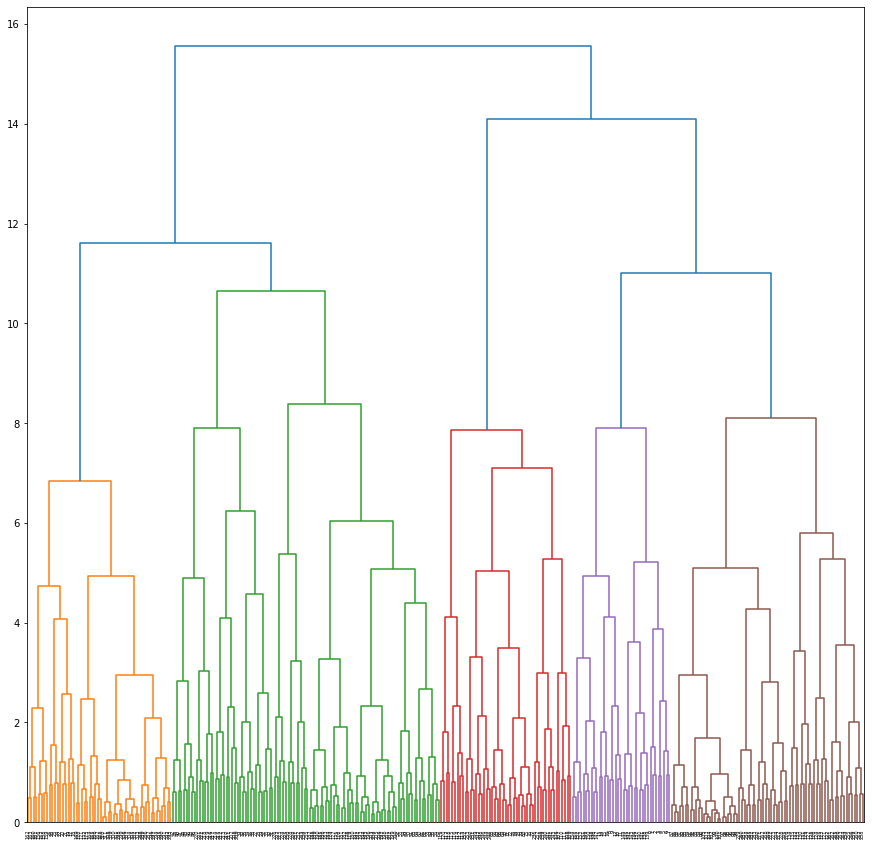

Linkage :  centroid


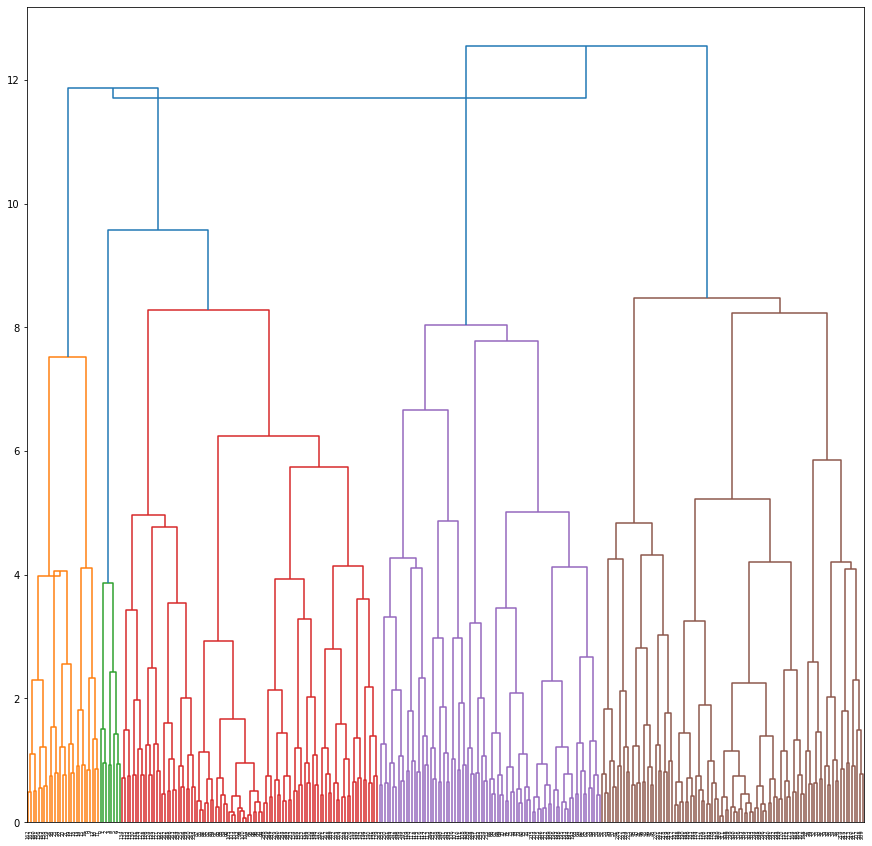

In [240]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage : ',i)
    plt.figure(figsize=(15,15))
    dend = shc.dendrogram(shc.linkage(df_main.loc[:,['x','y']], method=i))
    plt.show()

In [248]:
###MS4
output = []
linkage_list = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df_main.loc[:,['x','y']].values ,309, i, "cosine")
    output.append(target)

single
0    inf
Name: 215, dtype: float64
complete
average
centroid


In [251]:
output

[array([          3, -2147483648, -2147483648, -2147483648,           3,
                  3,           3,           3,           3,           3,
                  3,           1,           3,           3,           3,
                  3,           3,           3,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1,           1,           1,     

In [252]:
#giving names to the clusters
tmp = output[0]
tmp[tmp == 304] = 1
tmp[tmp < 0] = 2
tmp[tmp == 308] = 3
output[0]= tmp
output[0] = output[0].astype(int)

tmp = output[1]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[1] = tmp
output[1] = output[1].astype(int)
    
tmp = output[2]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[2] = tmp
output[2] = output[2].astype(int)
        
tmp = output[3]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[3] = tmp
output[3] = output[3].astype(int)
   

In [254]:
for i in range(0,len(output)):
    print('Linkage : ',linkages[i])
    print('Rand_Index value: ', rand_index(df_main['cluster'].values.astype('int'), output[i]))

Linkage :  single
Rand_Index value:  0.3714650836837332
Linkage :  complete
Rand_Index value:  0.33553879132657266
Linkage :  average
Rand_Index value:  0.3714650836837332
Linkage :  centroid
Rand_Index value:  0.33553879132657266


Linkage :  single


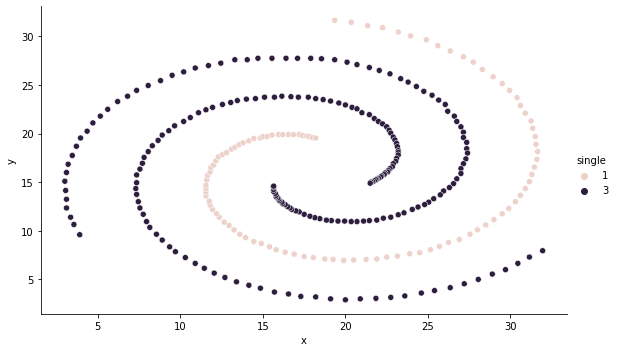

Linkage :  complete


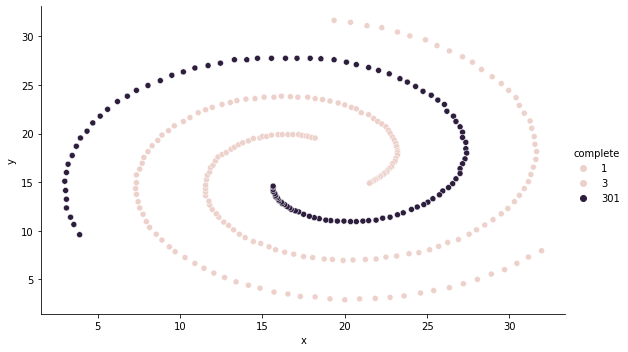

Linkage :  average


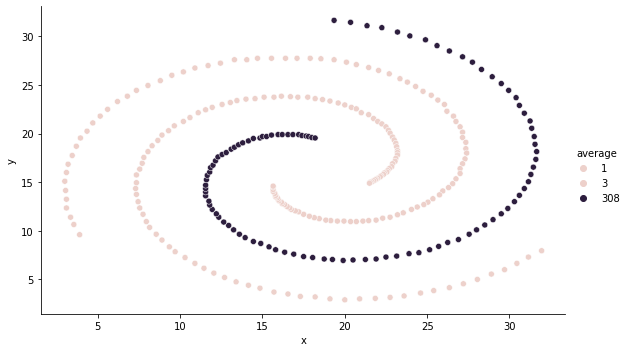

Linkage :  centroid


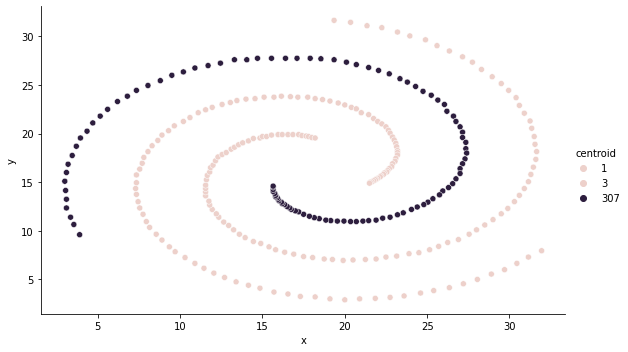

In [255]:
for i in range(0,len(output)):
    print('Linkage : ',linkages[i])
    sns.relplot(data=df_main, x='x', y='y', hue=linkages[i], aspect=1.61)
    plt.show()

Linkage :  single


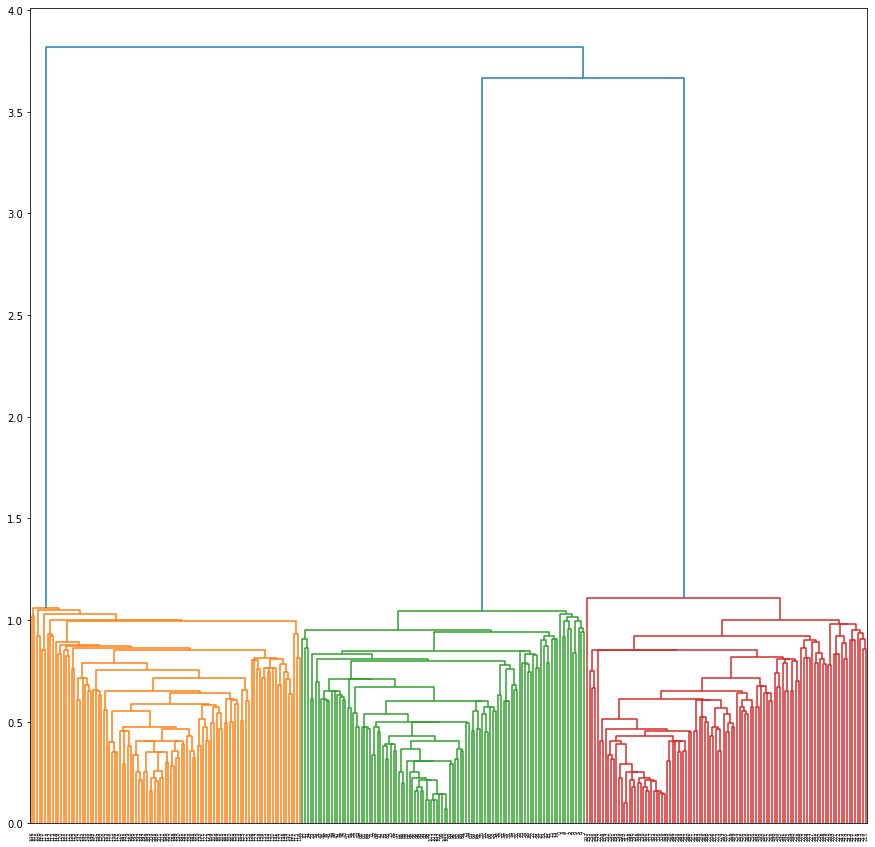

Linkage :  complete


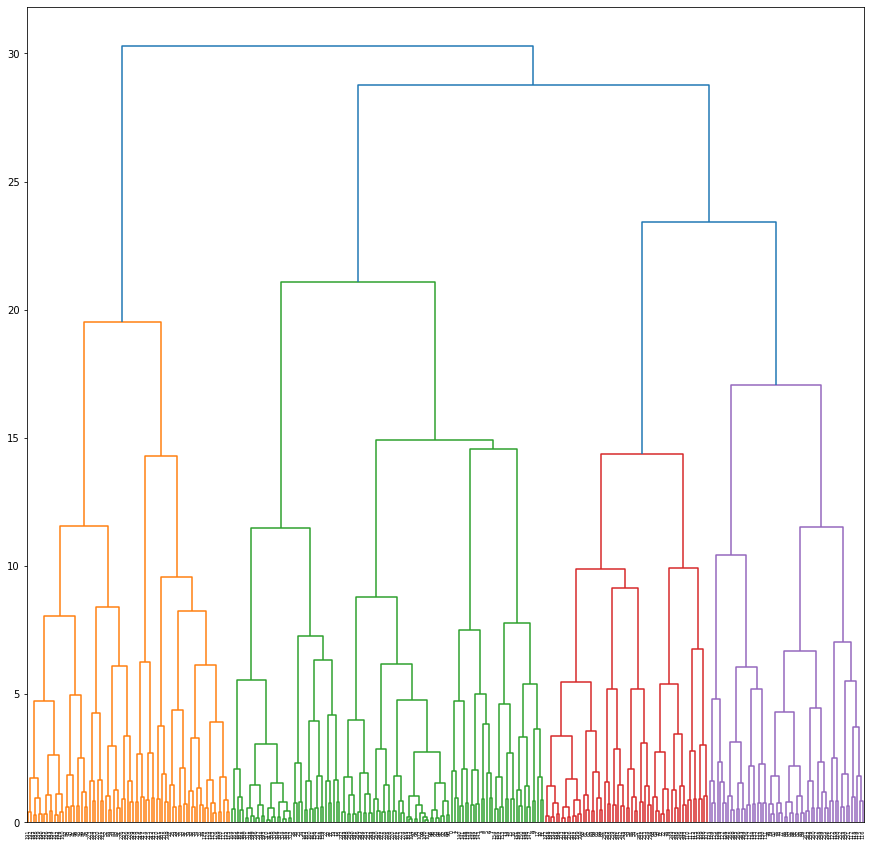

Linkage :  average


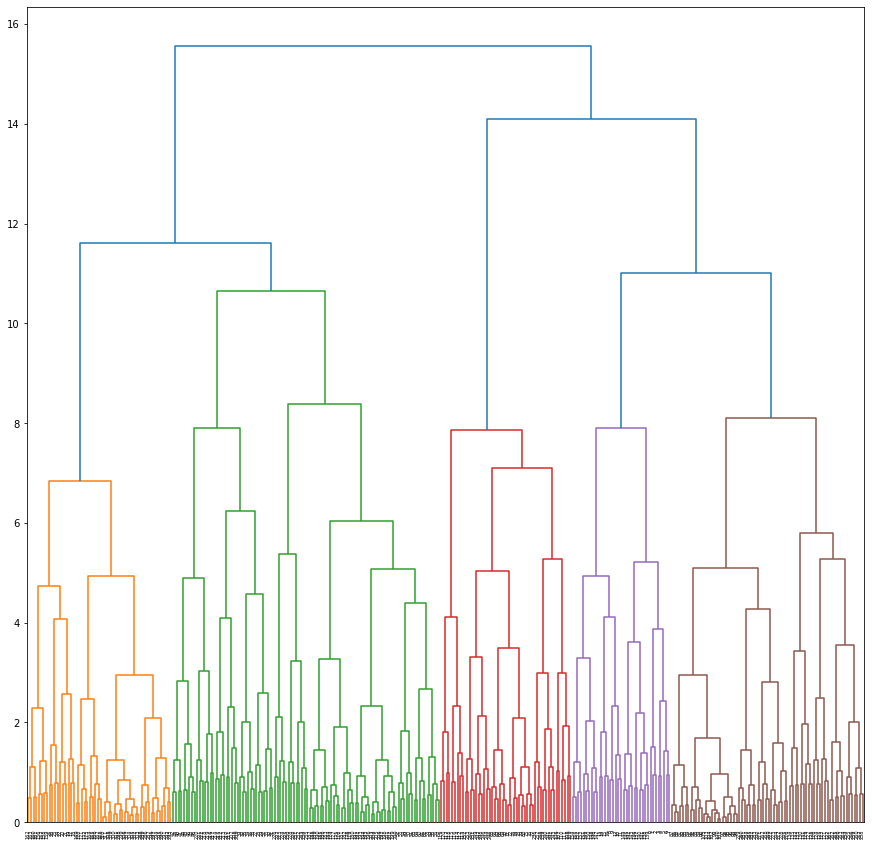

Linkage :  centroid


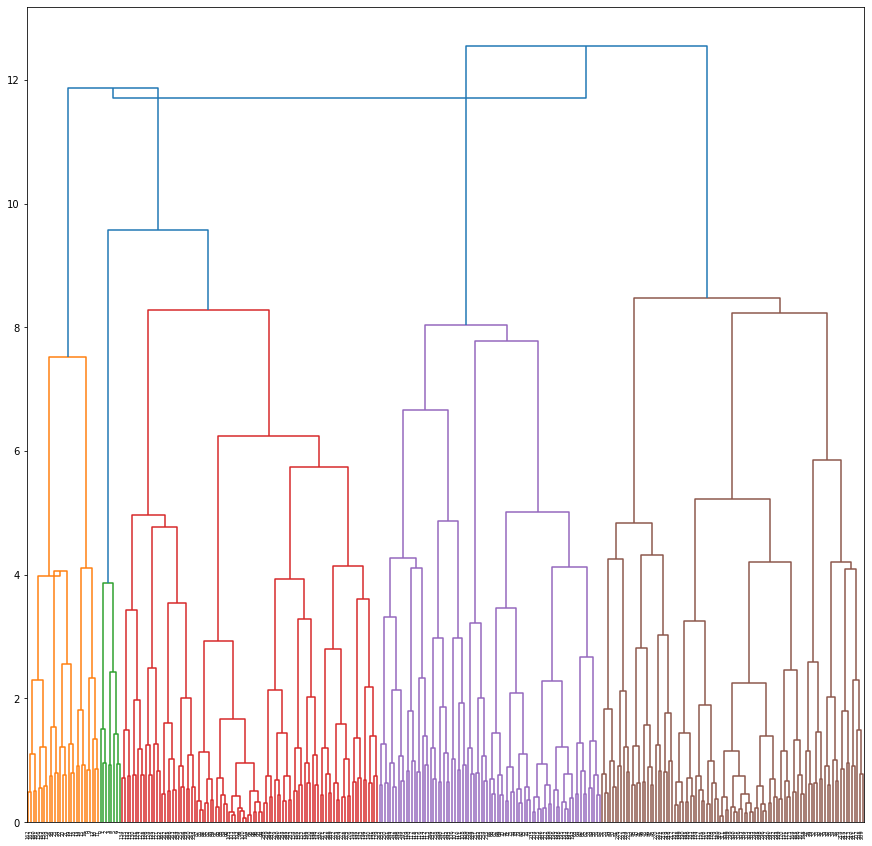

In [256]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage : ',i)
    plt.figure(figsize=(15,15))
    dend = shc.dendrogram(shc.linkage(df_main.loc[:,['x','y']], method=i))
    plt.show()

In [ ]:
#MS5

In [262]:
### Implementing MS5
output = []
linkage_list = ["single", "complete", "average", "centroid"]
for i in linkage_list:
    print(i)
    d, target = Heirarchical(df_main.loc[:,['x','y']].values ,309, i, "eucledian")
    output.append(target)

single
0    inf
Name: 101, dtype: float64
complete
average
centroid
[[ 0.    1.45  2.8  ... 22.6  22.85 22.95]
 [ 1.45  0.    1.35 ... 22.45 22.7  22.8 ]
 [ 2.8   1.35  0.   ... 22.4  22.65 22.75]
 ...
 [22.6  22.45 22.4  ...  0.    0.25  0.35]
 [22.85 22.7  22.65 ...  0.25  0.    0.1 ]
 [22.95 22.8  22.75 ...  0.35  0.1   0.  ]]


In [263]:
#giving names to the clusters
tmp = output[0]
tmp[tmp == 304] = 1
tmp[tmp < 0] = 2
tmp[tmp == 308] = 3
output[0]= tmp
output[0] = output[0].astype(int)

tmp = output[1]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[1] = tmp
output[1] = output[1].astype(int)
    
tmp = output[2]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[2] = tmp
output[2] = output[2].astype(int)
        
tmp = output[3]
tmp[tmp == 304] = 1
tmp[tmp <0] = 2
tmp[tmp == 308] = 3
output[3] = tmp
output[3] = output[3].astype(int)
   

Linkage :  single


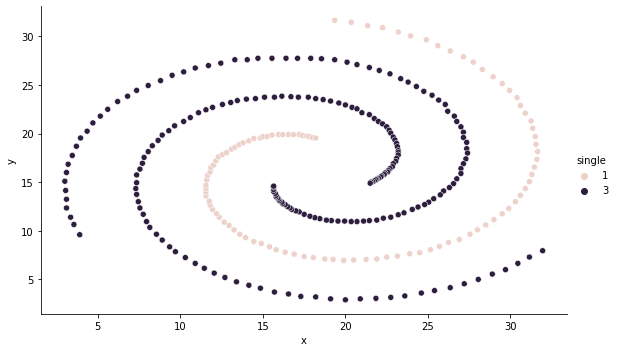

Linkage :  complete


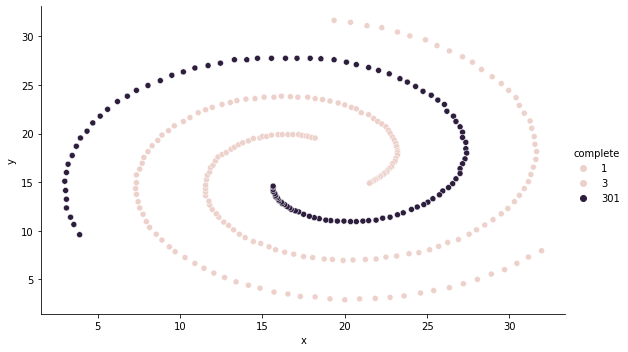

Linkage :  average


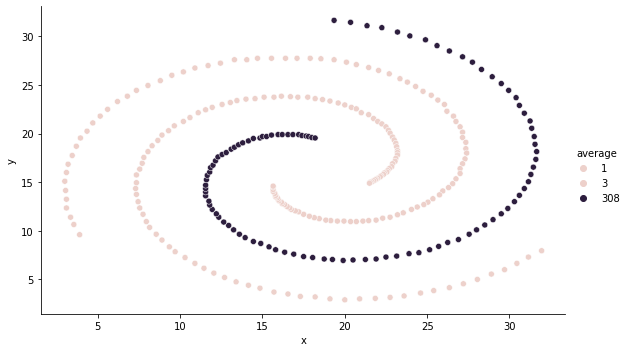

Linkage :  centroid


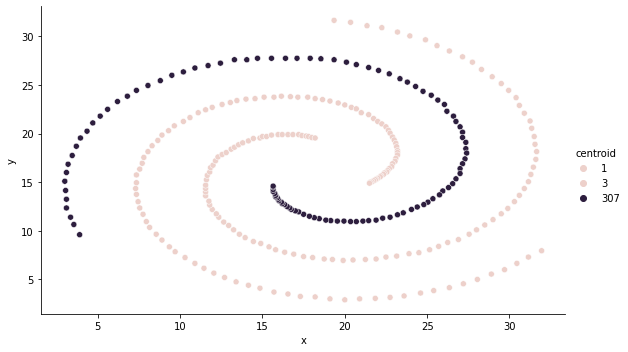

In [264]:
for i in range(0,len(output)):
    print('Linkage : ',linkages[i])
    sns.relplot(data=df_main, x='x', y='y', hue=linkages[i], aspect=1.61)
    plt.show()

Linkage :  single


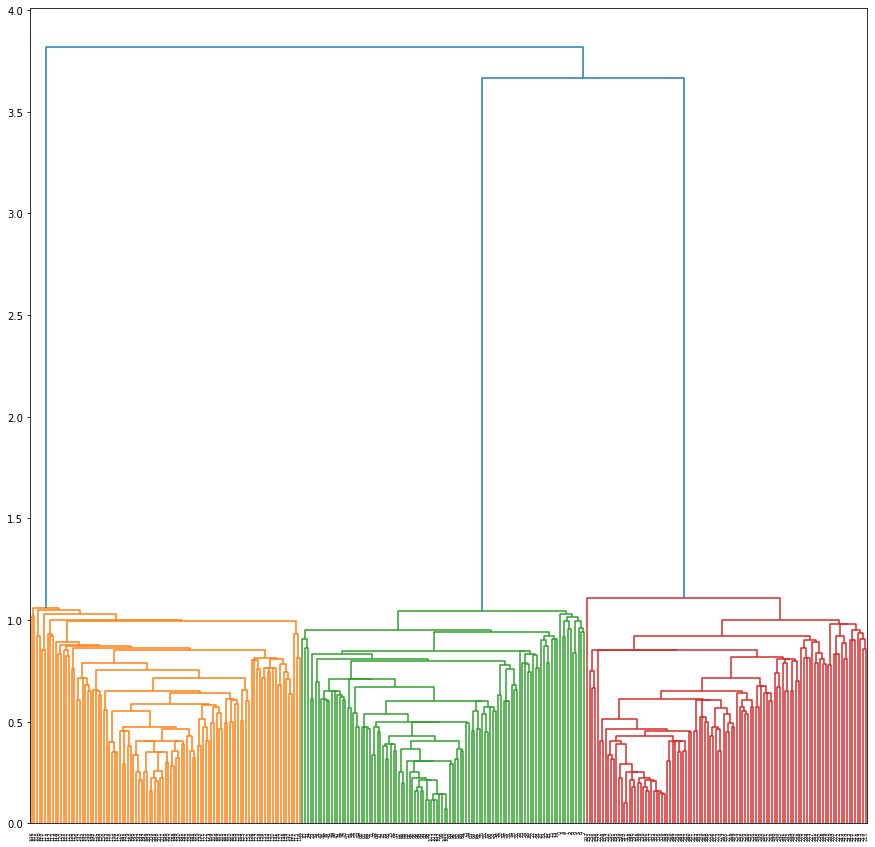

Linkage :  complete


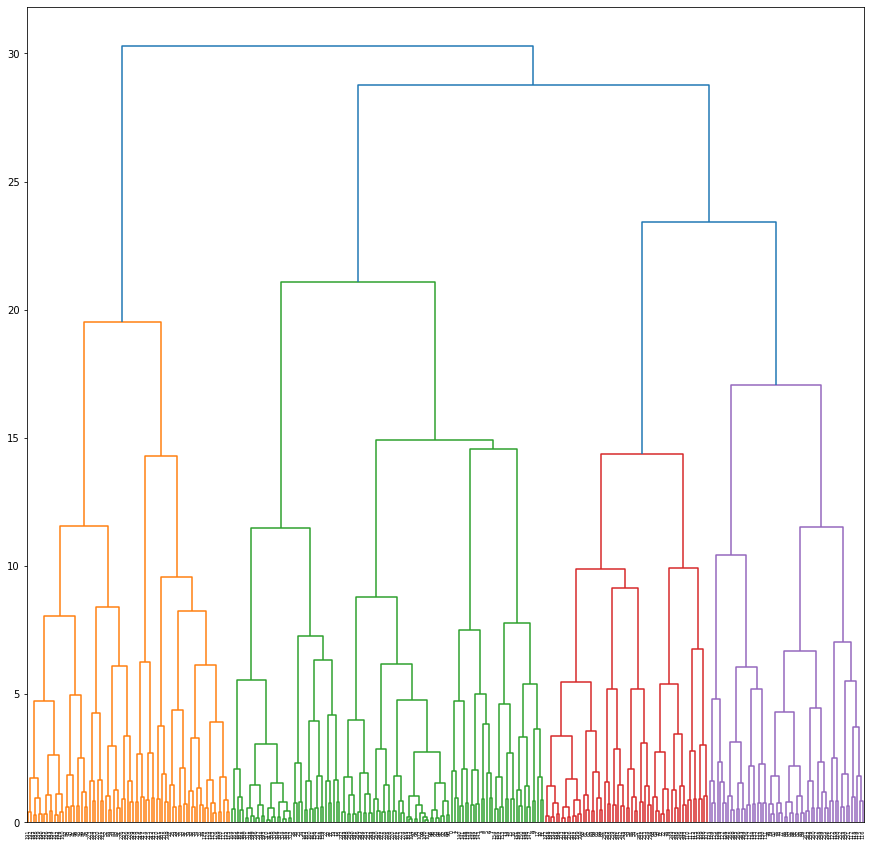

Linkage :  average


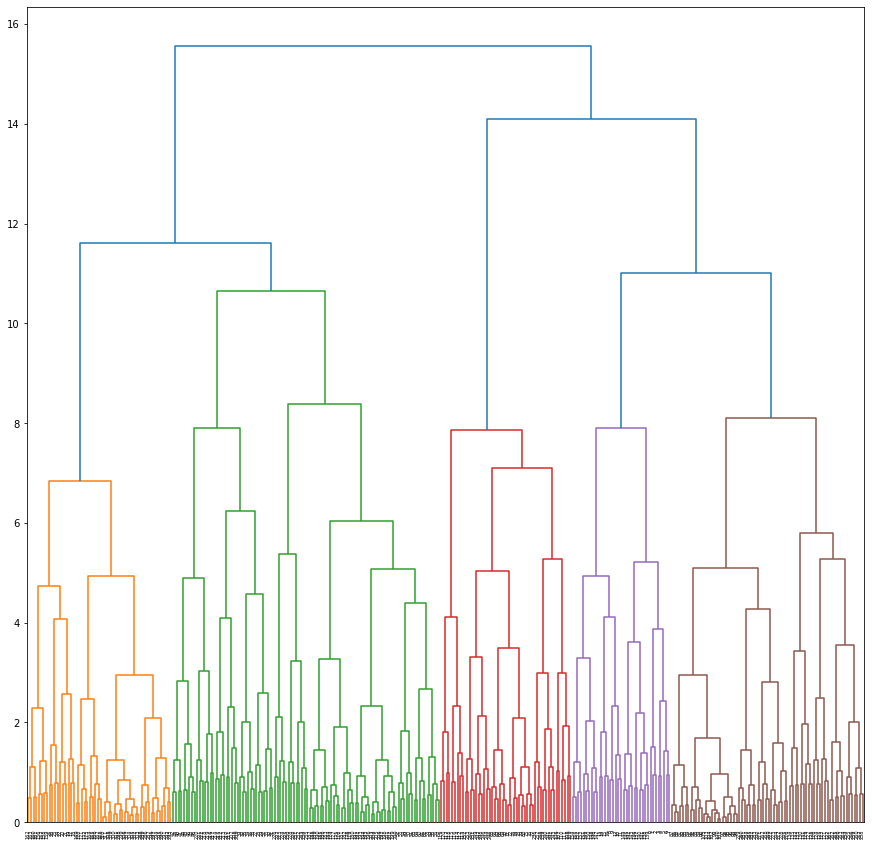

Linkage :  centroid


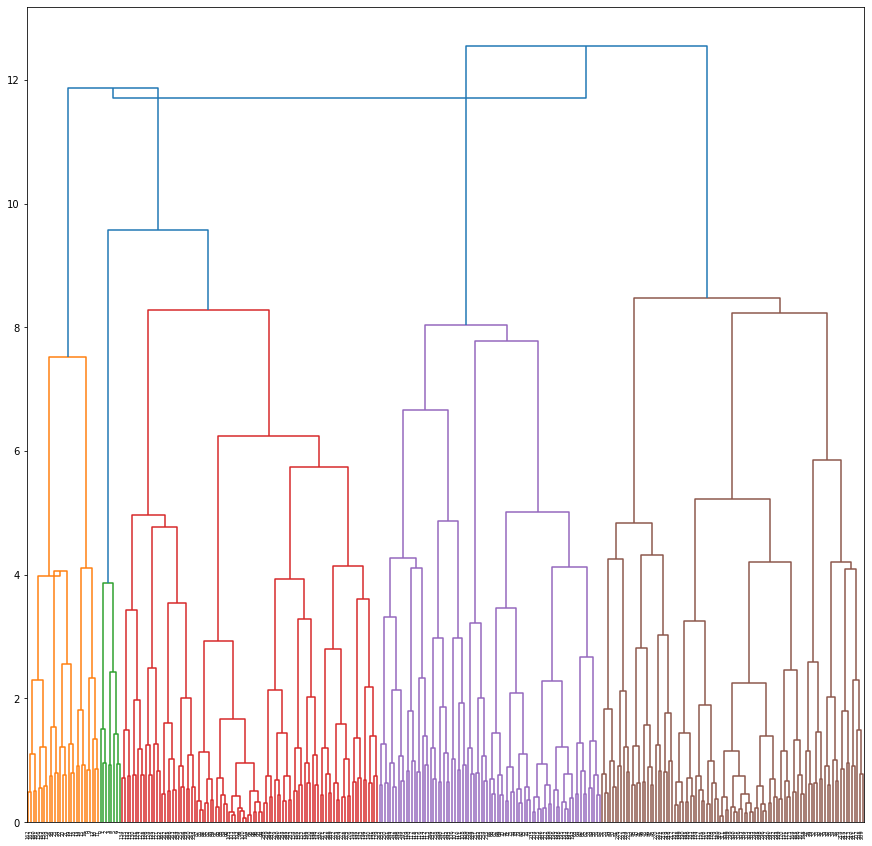

In [265]:
#Dendrogram
import scipy.cluster.hierarchy as shc
for i in linkage_list:
    print('Linkage : ',i)
    plt.figure(figsize=(15,15))
    dend = shc.dendrogram(shc.linkage(df_main.loc[:,['x','y']], method=i))
    plt.show()

### 2-a, 2-b, 2-c, MS1

1


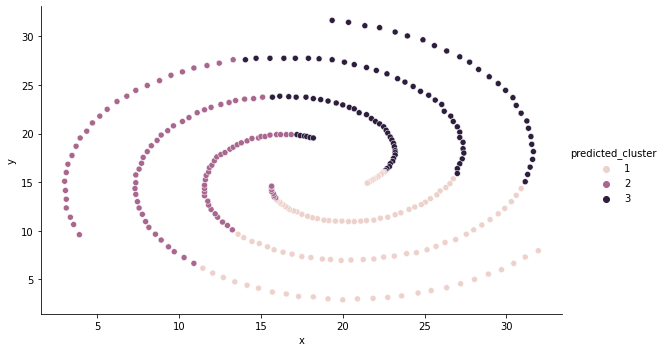

2


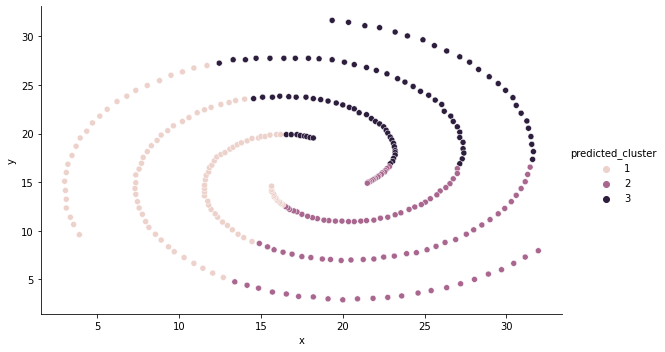

3


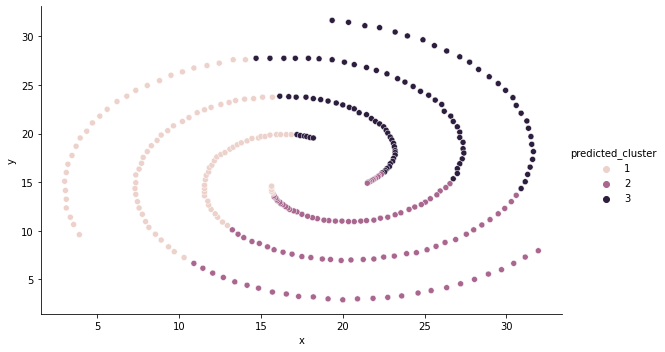

4


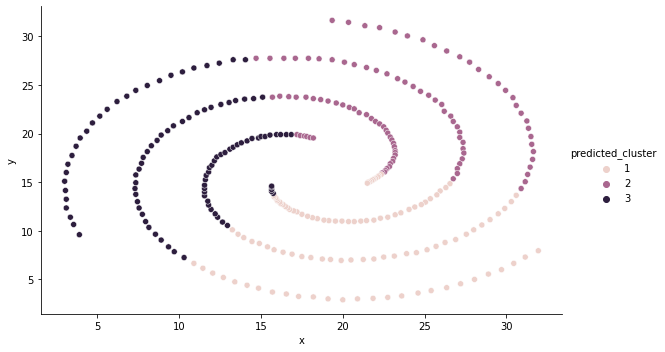

5


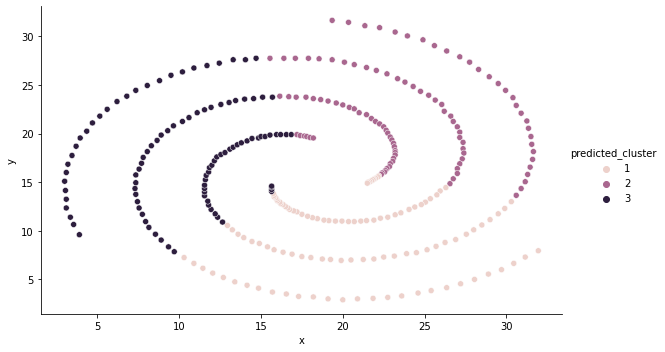

6


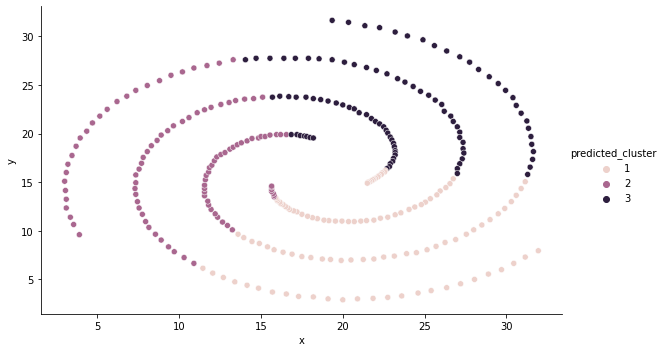

7


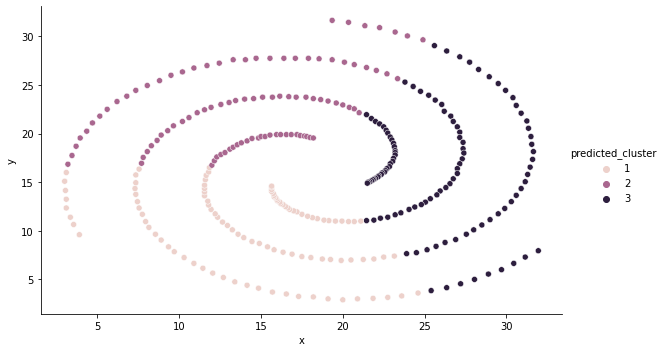

8


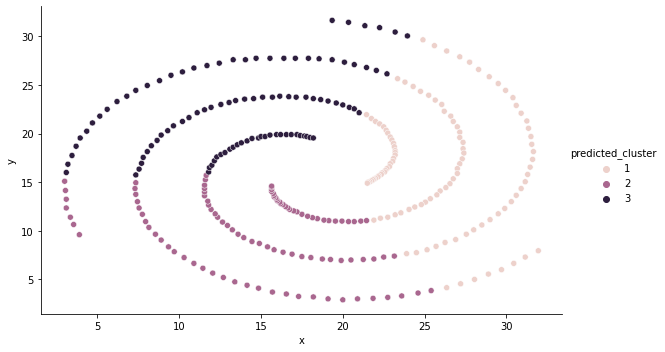

9


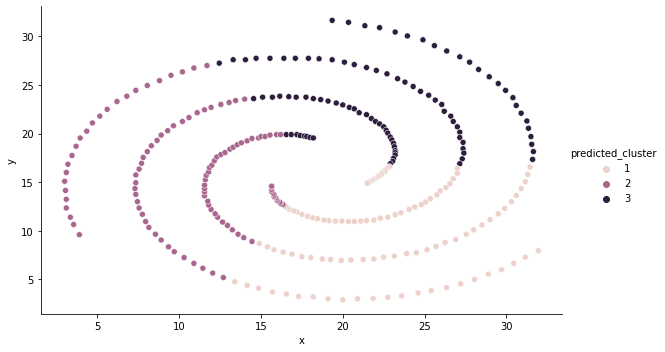

In [148]:
k_val = 3
sse_list = [sse]
rand_ind_list = [random_index]


for i in range(1,10):
    
    print(i)
    
    #initializing means
    mean_list = []
    for i in range(1,k_val+1):
        x = random.randint(3,32)
        y = random.randint(3,32)
        mean_list.append([x,y])
    mean_array = np.array([np.array(i) for i in mean_list])


    #generating new_mean for initial comparision
    new_mean_list = []
    for i in range(1,k_val+1):
        new_mean_list.append([0,0])

    new_mean_array = np.array([np.array(i) for i in new_mean_list])

    old_mean = new_mean_array
    new_mean = mean_array
    itr = 0

    #k-means
    while (~(old_mean==new_mean).all()):

        itr = itr + 1
        
        #calculating eucldeian distance from each centroid
        #df[''] = df.apply(lambda row: EOQ(row['D'], row['p'], ck, ch), axis=1)
        df['dist1'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[0][0], new_mean[0][1]), axis=1)
        df['dist2'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[1][0], new_mean[1][1]), axis=1)
        df['dist3'] = df.apply(lambda row: eucledian_distance(row['x'], row['y'],  new_mean[2][0], new_mean[2][1]), axis=1)

        #assigning cluster name
        df['predicted_cluster'] = df.apply(lambda row: finding_cluster(row['dist1'], row['dist2'], row['dist3']), axis=1)

        computed_mean_list = []
        #recomputing means for each cluster and updating mean  
        for i in sorted(df['predicted_cluster'].unique()):
            computed_mean_list.append([round(df[df['predicted_cluster']==i]['x'].mean(),2), round(df[df['predicted_cluster']==i]['y'].mean(),2)])

        computed_mean = np.array([np.array(i) for i in computed_mean_list])
        old_mean = new_mean
        new_mean = computed_mean    
        
    df['cluster_mean_x'] = df.apply(lambda row:  cluster_mean_x(row['predicted_cluster'], new_mean), axis=1)
    df['cluster_mean_y'] = df.apply(lambda row:  cluster_mean_y(row['predicted_cluster'], new_mean), axis=1)
    df['SSE'] = df.apply(lambda row:  SSE(row['x'], row['y'], row['cluster_mean_x'], row['cluster_mean_y']), axis=1)

    y_true = df['cluster'].values
    y_pred = df['predicted_cluster'].values
   

    #visualization
    sns.relplot(data=df, x='x', y='y', hue='predicted_cluster', aspect=1.61)
    plt.show()
    
    #sse
    sse = df['SSE'].sum()
    sse_list.append(sse)
    
    #rand_index
    random_index = rand_index(y_true, y_pred)
    rand_ind_list.append(random_index)
    

In [151]:
print('10 iterations best SSE : ',min(sse_list))

10 iterations best SSE :  12287.2254


In [152]:
print('10 iterations best Rand Index : ',max(rand_ind_list))

10 iterations best Rand Index :  0.3564356435643564
